# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [46]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON 441B ML Lab/W10/Country-data.csv", sep = ",")

In [47]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [48]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [49]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [50]:
# scale
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Run a PCA Algorithm to get 2 Principle Components for the 9 X features

In [51]:
# PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-2.91302459e+00,  9.56205755e-02],
       [ 4.29911330e-01, -5.88155666e-01],
       [-2.85225077e-01, -4.55174413e-01],
       [-2.93242265e+00,  1.69555507e+00],
       [ 1.03357587e+00,  1.36658709e-01],
       [ 2.24072616e-02, -1.77918658e+00],
       [-1.01583737e-01, -5.68251724e-01],
       [ 2.34216461e+00, -1.98845915e+00],
       [ 2.97376366e+00, -7.34688659e-01],
       [-1.81486997e-01, -4.02865873e-01],
       [ 1.26874386e+00, -6.56588363e-01],
       [ 1.67099640e+00,  5.61162493e-01],
       [-1.12385093e+00, -9.61397405e-01],
       [ 1.08137420e+00, -4.81969530e-01],
       [ 5.80025152e-01,  5.35326834e-01],
       [ 3.14378596e+00,  6.63547921e-01],
       [ 2.11255447e-01,  6.99242662e-01],
       [-2.67231388e+00,  4.18172125e-01],
       [-1.56570962e-01,  7.77395617e-01],
       [-7.93851561e-01, -1.20261085e-01],
       [ 9.95867143e-01, -9.71888439e-01],
       [-8.82087639e-01,  4.57368180e-01],
       [ 1.40781361e-01, -2.15107731e+00],
       [ 2.

In [52]:
PC1 = X_pca[:,0]
PC2 = X_pca[:,1]

# 2.) Plot a Scatter plot of the PCs on the axis

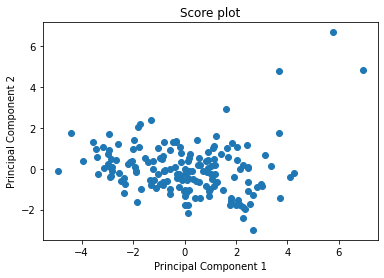

In [53]:
plt.scatter(x=PC1, y=PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Score plot')
plt.show()

# 3.) Rank the features in order of importance according to PCA

In [54]:
loadings = pca.components_
loadings

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ]])

In [59]:
# loadings
feature_importance = pd.DataFrame(np.sum(loadings**2, axis=0))
feature_names = df.columns[1:]

feature_importance.index = feature_names
feature_importance.sort_values(0, ascending=False)

,0
imports,0.477420
exports,0.456567
life_expec,0.230937
child_mort,0.213201
total_fer,0.187094
income,0.159263
gdpp,0.156288
health,0.081843
inflation,0.037386


# 4.) Plot a heatmap of the feature importance (Fill in all parameters)

In [60]:
feature_names = df.columns[1:]

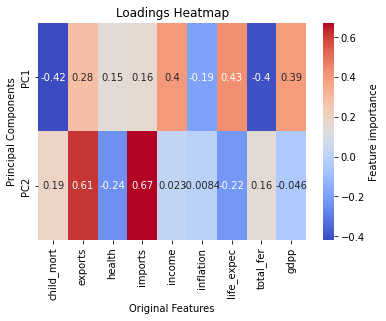

In [61]:
# sns.heatmap(loadings)
sns.heatmap(loadings, annot=True, cmap='coolwarm', xticklabels=feature_names, yticklabels=['PC1', 'PC2'], cbar_kws={'label':'Feature importance'})

plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings Heatmap')
plt.show()

# 5.) Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

[]

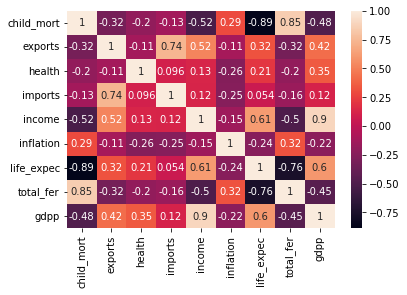

In [62]:
# Correlation plot
sns.heatmap(X.corr(), annot=True)
plt.plot()

We can observe a very high correlation coefficient -0.89 between child_mort and life_expect so we can see that they have similar loadings in both PC1 (-0.42, 0.43) and PC2(0.19, -0.22) in absolute values. Also, child_mort and total_fer is highly correlated with the coefficient 0.85. The loadings are -0.42 and -0.4 in PC1, and 0.19 and 0.16 in PC2. Imports and exports are correlated with the coefficient 0.74, Therefore their loadings are very similar too. As two variables have similar information, the degree of information added is also very similar.

# 6.) Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

In [63]:
# Fit PCA n=9
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

In [64]:
# Explained variance cumulative
np.cumsum(pca.explained_variance_ratio_)

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

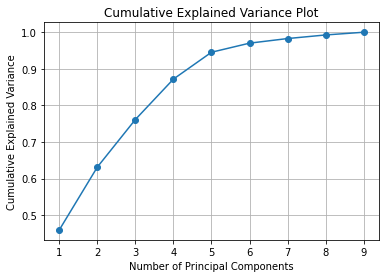

In [65]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

We need at least 6 principal components to account for 95% of the whole variance.